In [1]:
import pandas as pd
import numpy as np
import csv

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv("..\data\data.csv")

data = data.drop(columns = ['id'])
# data['diagnosis'].loc[data['diagnosis'] == 'B'] = 0
# data['diagnosis'].loc[data['diagnosis'] == 'M'] = 1
data['diagnosis'] = data['diagnosis'].replace('M', 1)
data['diagnosis'] = data['diagnosis'].replace('B', 0)
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


<AxesSubplot:>

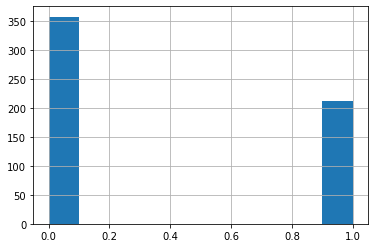

In [3]:
data["diagnosis"].hist()

<AxesSubplot:>

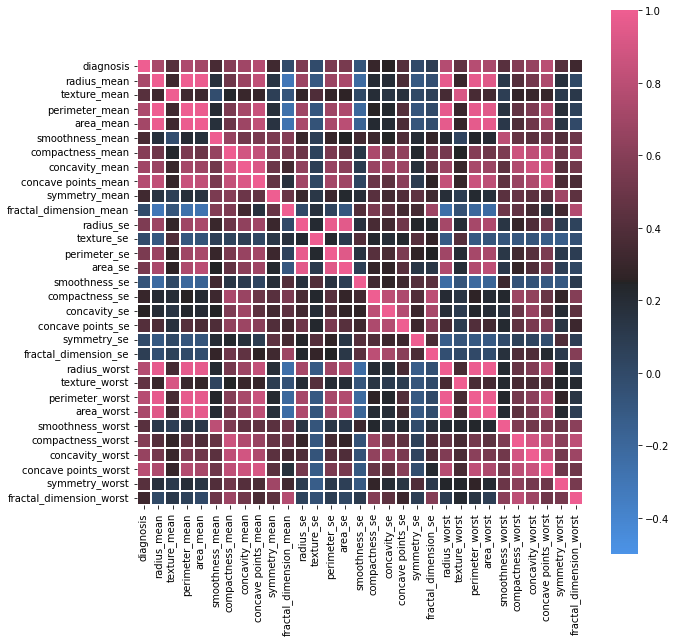

In [6]:
corr = data.iloc[:,:-1].corr(method = "pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

In [10]:
sample = data[["radius_mean", "texture_mean", "smoothness_mean", "area_mean", "compactness_mean", "concavity_mean","diagnosis"]]
sample.head(10)

,radius_mean,texture_mean,smoothness_mean,area_mean,compactness_mean,concavity_mean,diagnosis
0,17.99,10.38,0.11840,1001.0,0.27760,0.30010,1
1,20.57,17.77,0.08474,1326.0,0.07864,0.08690,1
2,19.69,21.25,0.10960,1203.0,0.15990,0.19740,1
3,11.42,20.38,0.14250,386.1,0.28390,0.24140,1
4,20.29,14.34,0.10030,1297.0,0.13280,0.19800,1
5,12.45,15.70,0.12780,477.1,0.17000,0.15780,1
6,18.25,19.98,0.09463,1040.0,0.10900,0.11270,1
7,13.71,20.83,0.11890,577.9,0.16450,0.09366,1
8,13.00,21.82,0.12730,519.8,0.19320,0.18590,1
9,12.46,24.04,0.11860,475.9,0.23960,0.22730,1


<AxesSubplot:xlabel='concavity_mean', ylabel='Count'>

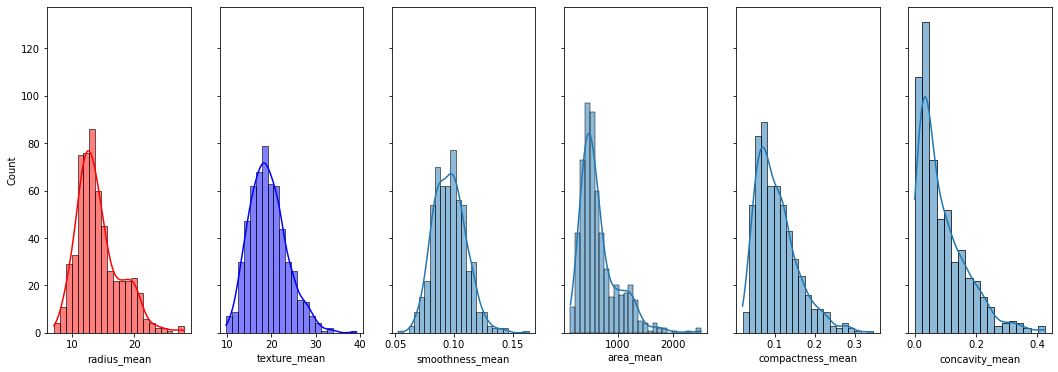

In [14]:
fig, axes = plt.subplots(1, 6, figsize=(18, 6), sharey=True)
sns.histplot(sample, ax=axes[0], x="radius_mean", kde=True, color='r')
sns.histplot(sample, ax=axes[1], x="texture_mean", kde=True, color='b')
sns.histplot(sample, ax=axes[2], x="smoothness_mean", kde=True)
sns.histplot(sample, ax=axes[3], x="area_mean", kde=True)
sns.histplot(sample, ax=axes[4], x="compactness_mean", kde=True)
sns.histplot(sample, ax=axes[5], x="concavity_mean", kde=True)

### Calculate P(Y=y) for all possible y

In [15]:
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

### Approach 1: Calculate P(X=x|Y=y) using Gaussian dist.

In [16]:
def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y] == label]
    mean, std = df[feat_name].mean(), df[feat_name].std()
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    return p_x_given_y

### Calculate P(X=x1|Y=y)P(X=x2|Y=y)...P(X=xn|Y=y) * P(Y=y) for all y and find the maximum

In [61]:
def naive_bayes_gaussian(df, X, Y):
    # get feature names
    features = list(df.columns)[1:-1]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)

### Test Gaussian model

In [62]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.2, random_state = 41)

X_test = test.iloc[:, 1: -1].values
Y_test = test.iloc[:, 0].values
Y_pred = naive_bayes_gaussian(train, X = X_test, Y = "diagnosis")

In [66]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
print(confusion_matrix(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))

[[72  2]
 [ 2 38]]
0.9649122807017544
0.9500000000000001
